# SIT718 Assessment 3

__Student Name: Thomas Warren__

__ID: 223053304__

__Email: s223053304@deakin.edu.au__


### Question 1.1 ###

**1)** The four outcome variables were considered 


In [60]:
# import getpass
# import datetime
# import socket

# def generate_author_claim():
#     # Get current user
#     user = getpass.getuser()

#     # Get current timestamp
#     timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

#     # Get current IP address
#     ip_address = socket.gethostbyname(socket.gethostname())

#     # Enter your name
#     name = input("Enter your full name: ")

#     # Enter your email address
#     email = input("Enter your email address: ")

#     # Enter your student ID
#     student_id = input("Enter your student ID: ")

#     # Generate author claim string
#     author_claim = f"Code authored by {user} ({name} {student_id} {email}) on {timestamp}  from IP address {ip_address}"

#     return author_claim

# # Generate the author claim string
# author_claim = generate_author_claim()

# # Print the author claim string
# print(author_claim)


In [61]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import datetime

In [62]:
# Import the Excel file
df = pd.read_excel('../data/raw/app_data.xlsx')

# Drop other target variables
df = df.drop(['Severity', 'Diagnosis_Presumptive', 'Diagnosis'], axis=1)

In [63]:
# Create log directory
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [64]:
# Review dataset
df['Management'].value_counts()
df = df[df['Management'] != 'simultaneous appendectomy']


In [65]:
df['Management'].value_counts()

Management
conservative          483
primary surgical      270
secondary surgical     27
Name: count, dtype: int64

In [66]:
df[df['Management'] == 'conservative'].sample(10)

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
478,12.429843,19.377163,male,170.0,56.0,3.0,conservative,8.0,6.0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
281,7.211499,15.378700,male,127.5,25.0,3.0,conservative,3.0,2.0,yes,...,NaN,yes,MB,NaN,NaN,NaN,yes,NaN,NaN,NaN
204,4.520000,14.000000,female,110.0,16.5,4.0,conservative,8.0,9.0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN
7,7.060000,NaN,female,NaN,21.5,2.0,conservative,3.0,3.0,no,...,NaN,yes,re UB,no,NaN,NaN,NaN,NaN,NaN,NaN
84,15.090000,18.700000,male,192.0,69.0,2.0,conservative,4.0,3.0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN
356,11.085558,16.428340,female,147.0,35.5,3.0,conservative,7.0,6.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN
178,7.020000,10.900000,male,132.0,19.0,2.0,conservative,8.0,7.0,yes,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,11.383984,30.629251,female,149.0,68.0,3.0,conservative,3.0,3.0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,12.558522,24.816327,male,175.0,76.0,3.0,conservative,4.0,4.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN
105,7.300000,15.900000,female,123.0,23.5,3.0,conservative,9.0,7.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df[df['Management'] == 'primary surgical'].sample(10)

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
696,14.198494,19.934760,female,156.3,48.7,11.0,primary surgical,5.0,3.0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,keine
562,4.610000,17.030000,male,107.0,19.5,9.0,primary surgical,NaN,NaN,yes,...,NaN,yes,mesenterial,yes,NaN,NaN,NaN,NaN,NaN,NaN
755,14.647502,17.842710,female,162.3,47.0,5.0,primary surgical,6.0,5.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631,4.243669,15.419501,male,105.0,17.0,5.0,primary surgical,NaN,NaN,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
622,11.258042,16.885224,male,151.0,38.5,5.0,primary surgical,7.0,5.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
757,10.099932,19.044321,female,152.0,44.0,5.0,primary surgical,8.0,8.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
662,9.119781,16.382219,male,143.0,33.5,5.0,primary surgical,5.0,4.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
547,6.640000,12.820000,male,128.0,21.0,14.0,primary surgical,9.0,7.0,yes,...,NaN,NaN,NaN,yes,NaN,yes,yes,NaN,NaN,NaN
514,12.520000,15.650000,male,143.0,32.0,5.0,primary surgical,6.0,5.0,no,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,yes,NaN,NaN
583,9.140000,15.250000,male,135.5,28.0,7.0,primary surgical,8.0,7.0,yes,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN


In [68]:
df[df['Management'] == 'secondary surgical'].sample(10)

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
766,10.990000,19.170000,male,148.0,42.00,4.0,secondary surgical,8.0,6.0,yes,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,13.830000,17.300000,female,170.0,50.00,5.0,secondary surgical,3.0,2.0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
660,9.960000,13.510000,male,146.5,29.00,5.0,secondary surgical,9.0,8.0,yes,...,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN
761,14.398357,17.036400,female,161.8,44.60,3.0,secondary surgical,2.0,4.0,no,...,NaN,NaN,NaN,yes,NaN,NaN,NaN,yes,NaN,NaN
552,7.190000,13.210000,male,130.5,22.50,2.0,secondary surgical,9.0,7.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
614,8.680000,16.600000,male,131.9,28.55,4.0,secondary surgical,2.0,2.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
535,14.950000,20.320000,female,163.0,54.00,3.0,secondary surgical,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,12.590000,15.620000,female,164.0,42.00,4.0,secondary surgical,8.0,5.0,yes,...,NaN,NaN,NaN,NaN,NaN,no,no,NaN,NaN,NaN
625,10.830938,14.285714,NaN,140.0,28.50,4.0,secondary surgical,9.0,9.0,yes,...,NaN,yes,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN
723,14.951403,20.312500,female,160.0,52.00,10.0,secondary surgical,5.0,4.0,yes,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,keine


In [69]:
df['Management'].value_counts()

Management
conservative          483
primary surgical      270
secondary surgical     27
Name: count, dtype: int64

In [70]:
# For scores, NaN values are considered 0
df['Paedriatic_Appendicitis_Score'] = df['Paedriatic_Appendicitis_Score'].fillna(0)

In [71]:
# Drop rows with many missing values
empty_columns = []
for i in df.columns:
    if df[i].isna().sum() >= len(df)*0.8:
        empty_columns.append(i)
    else:
        continue

print(empty_columns)
len(empty_columns)

#Drop empty columns
df = df.drop(empty_columns, axis=1)

['Segmented_Neutrophils', 'Target_Sign', 'Appendicolith', 'Perfusion', 'Perforation', 'Appendicular_Abscess', 'Abscess_Location', 'Lymph_Nodes_Location', 'Bowel_Wall_Thickening', 'Conglomerate_of_Bowel_Loops', 'Ileus', 'Coprostasis', 'Meteorism', 'Enteritis', 'Gynecological_Findings']


In [72]:
## Resolve missing heights
# Round all ages to the nearest whole number
df['Age'] = df['Age'].round(0)

# Find average heights for sexes and ages
mean_height_df = df.groupby(['Sex', 'Age'])['Height'].mean().reset_index()

# Fill in missing height values with averages for age and sex



In [73]:
df.isna().sum()

Age                                   1
BMI                                  27
Sex                                   2
Height                               26
Weight                                3
Length_of_Stay                        4
Management                            1
Alvarado_Score                       52
Paedriatic_Appendicitis_Score         0
Appendix_on_US                        5
Appendix_Diameter                   283
Migratory_Pain                        9
Lower_Right_Abd_Pain                  8
Contralateral_Rebound_Tenderness     15
Coughing_Pain                        16
Nausea                                8
Loss_of_Appetite                     10
Body_Temperature                      7
WBC_Count                             6
Neutrophil_Percentage               103
Neutrophilia                         50
RBC_Count                            18
Hemoglobin                           18
RDW                                  26
Thrombocyte_Count                    18


In [74]:
# # Fill in missing BMI values
# df[df['BMI'].isna()] = df[df['BMI'].isna()].fillna(df['Weight'] / (df['Height'] / 100)**2)

In [75]:
empty_columns = []
for i in df.columns:
    if df[i].isna().sum() > 100:
        empty_columns.append(i)

df.drop(empty_columns, axis=1, inplace=True)


In [76]:
# Determine numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Fill numerical missing data with median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

df.dropna(axis=0, inplace=True)


In [77]:
# For convienence, we will convert the target variable without dropping the first
df = pd.get_dummies(df, columns=['Management'], drop_first=False)

# Determine categorical columns other than target
categorical_columns = df.select_dtypes(include='object').columns

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [78]:
df.head()

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Body_Temperature,WBC_Count,RBC_Count,...,Loss_of_Appetite_yes,Neutrophilia_yes,Dysuria_yes,"Stool_constipation, diarrhea",Stool_diarrhea,Stool_normal,Peritonitis_local,Peritonitis_no,Psoas_Sign_yes,Free_Fluids_yes
0,13.0,16.9,148.0,37.0,3.0,4.0,3.0,37.0,7.7,5.27,...,True,False,False,False,False,True,False,True,True,False
1,14.0,31.9,147.0,69.5,2.0,5.0,4.0,36.9,8.1,5.26,...,True,False,True,False,False,True,False,True,True,False
2,14.0,23.3,163.0,62.0,4.0,5.0,3.0,36.6,13.2,3.98,...,False,False,False,False,False,False,False,True,True,False
3,16.0,20.6,165.0,56.0,3.0,7.0,6.0,36.0,11.4,4.64,...,True,False,True,False,False,True,False,True,True,False
4,11.0,16.9,163.0,45.0,3.0,5.0,6.0,36.9,8.1,4.44,...,True,False,False,False,False,False,False,True,True,False


In [79]:
df.dtypes

Age                                     float64
BMI                                     float64
Height                                  float64
Weight                                  float64
Length_of_Stay                          float64
Alvarado_Score                          float64
Paedriatic_Appendicitis_Score           float64
Body_Temperature                        float64
WBC_Count                               float64
RBC_Count                               float64
Hemoglobin                              float64
RDW                                     float64
Thrombocyte_Count                       float64
CRP                                     float64
US_Number                               float64
Management_conservative                    bool
Management_primary surgical                bool
Management_secondary surgical              bool
Sex_male                                   bool
Appendix_on_US_yes                         bool
Migratory_Pain_yes                      

In [80]:
# Create train and test datasets
X = df.drop(['Management_conservative','Management_primary surgical', 'Management_secondary surgical'], axis=1)
y = df[['Management_conservative','Management_primary surgical', 'Management_secondary surgical']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
y_train.shape


(506, 3)

In [83]:
# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [88]:
# save the initial weights for later experiments
init_weights = model.get_weights()

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[tensorboard_callback])

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9659 - loss: 0.0864 - val_accuracy: 0.9118 - val_loss: 0.3298
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9606 - loss: 0.1063 - val_accuracy: 0.9020 - val_loss: 0.3384
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9793 - loss: 0.0867 - val_accuracy: 0.9020 - val_loss: 0.3344
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9861 - loss: 0.0669 - val_accuracy: 0.9118 - val_loss: 0.3442
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9880 - loss: 0.0676 - val_accuracy: 0.9118 - val_loss: 0.3548
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9922 - loss: 0.0634 - val_accuracy: 0.9118 - val_loss: 0.3518
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9866 - loss: 0.0638 - val_accuracy: 0.9118 - val_loss: 0.3588
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9866 - loss: 0.0562 - val_accuracy: 0.9118 - val_loss

In [86]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9049 - loss: 0.2558 


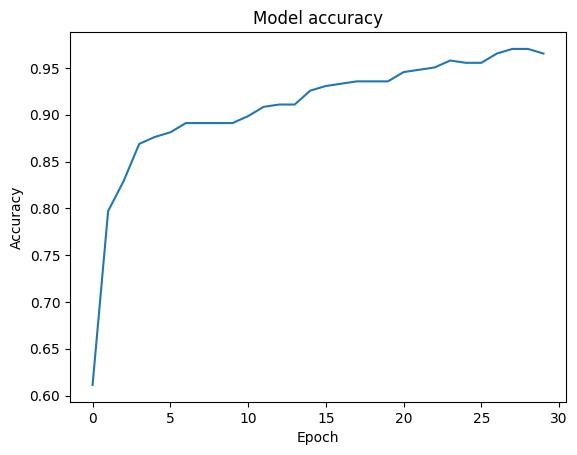

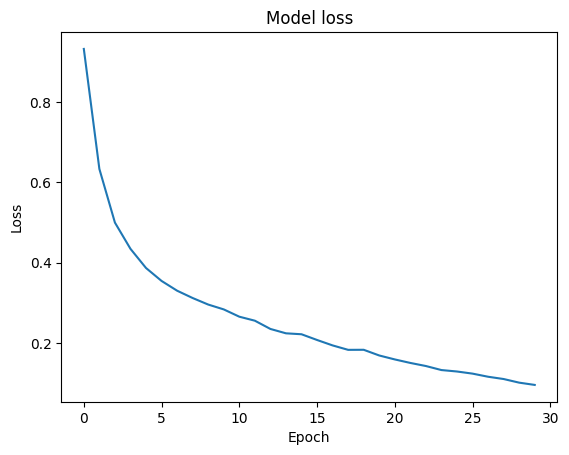

In [87]:
# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot training loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [89]:
# Create tensorboard 
%load_ext tensorboard
%tensorboard --logdir logs/fit